# **Objective: Combine League Seasons and Eplore Data**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import dateutil.parser
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Name individual seasons
W20 = pd.read_csv("Data/WCD-20W-Legs.csv")
F19 = pd.read_csv("Data/WCD-19F-Legs.csv")
S19 = pd.read_csv("Data/WCD-19S-Legs.csv")
W19 = pd.read_csv("Data/WCD-19W-Legs.csv")
F18 = pd.read_csv("Data/WCD-18F-Legs.csv")
S18 = pd.read_csv("Data/WCD-18S-Legs.csv")
W18 = pd.read_csv("Data/WCD-18W-Legs.csv")
F17 = pd.read_csv("Data/WCD-17F-Legs.csv")
S17 = pd.read_csv("Data/WCD-17S-Legs.csv")
W17 = pd.read_csv("Data/WCD-17W-Legs.csv")
F16 = pd.read_csv("Data/WCD-16F-Legs.csv")
S16 = pd.read_csv("Data/WCD-16S-Legs.csv")

In [40]:
#Make a list of all seasons
each = [W20, F19, S19, W19, F18, S18, W18, F17, S17, W17, 
                   F16, S16]

In [ ]:
#Function for normalizing dates in legs
def to_date(dateobj):
    date = dateutil.parser.parse(dateobj)
    return date

In [5]:
#List of dates
WNT = each[0]
WT = WNT['Date']
WN = []
for date in WT:
    WN.append(date)
for date in WN:
    to_date(date)

In [25]:
#Loop for normalizing dates
for season in WCD_All_Seasons:
    RLDT = []
    xdt = season['Date']
    for date in xdt:
        rdt = to_date(date)
        RLDT.append(rdt)
    
    season['True_Date'] = RLDT

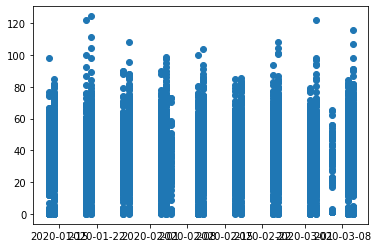

In [29]:
#Check last season's 3DA distribution by date
W = W20['TrueDate']
plt.scatter(W20['TrueDate'],W20['3DA']);

In [74]:
#Combine season legs in a dataframe
WCD_All_Legs = []
for season in each:
    WCD_All_Legs.append(season)

All_Legs = pd.concat(WCD_All_Legs)
All_Legs.reset_index()    

In [33]:
#Export to csv
All_Legs.to_csv('WCD_All_Legs.csv')

In [34]:
#Break out Cricket legs
All_Cricket = All_Legs.where(All_Legs['Game'] == 'Cricket')

array([[<AxesSubplot:title={'center':'3DA'}>]], dtype=object)

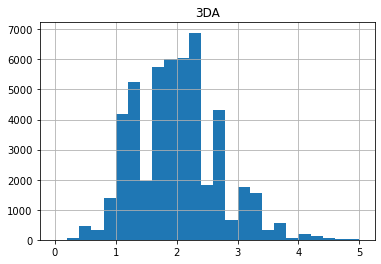

In [221]:
#Cricket 3DA histogram
All_Cricket.hist('3DA', bins=25, range=[0,5])

In [222]:
#Export cricket legs to csv
All_Cricket.to_csv('All_Cricket.csv')

In [217]:
# Function to define ordinal values for match dates
def seasonindex(season):
    SeasonOpen = min(season['TrueDate'])
    SeasonClose = max(season['TrueDate'])
    SeaInd = []
    for date in season['TrueDate']:
        days = date - SeasonOpen
        SeaInd.append(days.days)
    season['Season_Day'] = SeaInd
    sealen = (SeasonClose - SeasonOpen).days
    print("Season is", sealen, "days long")

In [268]:
# Make each team's season unique for when seasons are indexed
seacount = 0

for season in each[::-1]:
    seacount += 1
    season['TeamSeason'] = season['Team'] + str(seacount)

In [284]:
# Pull wins out of W/A column
for season in each:
    
    season['Wins'] = (season['W/A'] != '0')

In [226]:
# Index each season
for season in each:
    seasonindex(season)

Season is 57 days long
Season is 734104 days long
Season is 134 days long
Season is 85 days long
Season is 733734 days long
Season is 116 days long
Season is 85 days long
Season is 733340 days long
Season is 99 days long
Season is 85 days long
Season is 732949 days long
Season is 99 days long


In [ ]:
# Problem with Fall Seasons - investigate dates out of range
seasonindex(F19)

In [227]:
# Break Fall Seasons out
IndSeas = [W20, S19, W19, S18, W18, S17, W17, S16]
FallSeas = [F19, F18, F17, F16]

In [286]:
# Get Cricket games from non-Fall seasons, put in data frame
IndCricket = []
for season in IndSeas:
    crick = season.where(season['Game'] == 'Cricket')
    IndCricket.append(crick)
    
IndCrick = pd.concat(IndCricket)
IndCrick.dropna()

In [290]:
# Export to csv
IndCrick.to_csv("WCD_TeamS_Cricket.csv")

## Starting Point After Seasons Indexed and Cricket Separated

In [4]:
# Load Cricket Data
IndCrick = pd.read_csv("Data/WCD_TeamS_Cricket.csv")

<AxesSubplot:xlabel='Season_Day', ylabel='3DA'>

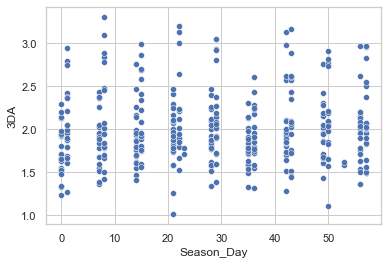

In [262]:
# Single season indexed 3DA plot
sns.set_theme(style="whitegrid")
sns.scatterplot(x="Season_Day", y="3DA",
             data=W20Crick)

In [235]:
# Define function for team's season 3DA averages
def teamavg(teamseason):
    teamseason = []
    for teamwk in teamseason:
        teamseason.append([teamwk['Season_Day'], teamwk['Team'], teamwk['3DA']])
    return teamseason

### *Use VLookup for Season Averages (Excel)*

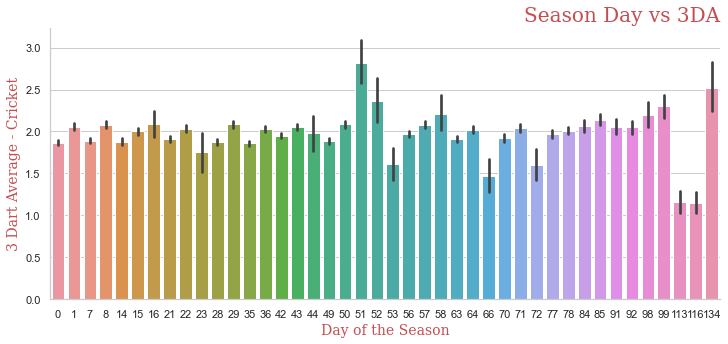

In [10]:
# Plot of indexed season 3DAs
sns.set_theme(style="whitegrid",
              palette = sns.color_palette("Spectral"))

f, ax = plt.subplots(figsize=(12, 5))
sns.despine(f)

sns.barplot(x="Season_Day", y="3DA",
             data=IndCrick)

plt.title('Season Day vs 3DA',family='serif',fontsize = 20,
          loc='right',color='r')

plt.xlabel('Day of the Season',fontsize = 14,family='serif', color='r')
plt.ylabel('3 Dart Average - Cricket',fontsize = 14,family='serif', color='r')

plt.savefig('WCD_Heart_Attack2.png')